# Task 1

Compute and plot the first and second derivative of the above one-dimensional functions using your method of choice in the value range from -4 to 4 using an appropriate grid spacing.

# Task 2

Compute and plot the partial first derivatives of the above two-dimensional functions using autograd in the value range from -4 to 4 using an appropriate grid spacing. 

# Task 3
Construct and plot the second derivative of function1, $d^2f_1/dx^2$, through the Laplacian matrix in the value range from -4 to 4 using an appropriate grid spacing.

In [79]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm

from autograd.numpy import *  # this is a numpy wrapper 
from autograd import grad

from autograd import elementwise_grad as egrad 

import sympy as sp

In [80]:
def function1(x):
    y = x*(x - 3)*(x + 3)
    return y

def function2(x):
    y = abs(x)
    return y

def function3(x):
    y = sin(x * 2.1) * (-x / 2.0)
    return y

def function4(x):
    y = 1.6**x - 1.5 * x
    return y

def function5(x,y):
    z = sin(x + y) * tan(0.1 * x)
    return z

def function6(x,y):
    z = sin(sqrt(5) + x) * y
    return z

In [83]:
a=-4
b=4
npoints = 51
num,dx = linspace(a, b, npoints, retstep=True)
mf=18

## Task 1

Compute and plot the first and second derivative of the above one-dimensional functions using your method of choice in the value range from -4 to 4 using an appropriate grid spacing.

In [71]:
class deriv:
    def __init__(self, fval):
        self.dx=dx
        self.fv=fval

    def firstderiv(self):
        dydx_diff = diff(self.fv)/self.dx
        #dydx_grad_e2 = gradient(self.fv, self.dx, edge_order=2)

        # put the diff points between original points
        num2 = num + dx/2
        return dydx_diff, num, num2#, dydx_grad_e2
    
    def secondderiv(self):
        d2ydx2_diff = diff(self.fv,n=2)/self.dx**2
        num3 = num2 + dx/2
        
        return d2ydx2_diff, num3

    def plotfunc(self, dydx_diff, num, num2, funcname):#, dydx_grad_e2):
        mf=18
        fig, ax = plt.subplots(figsize=(8,5))

        plt.plot(num, self.fv, label=funcname)
        plt.plot(num2[0:-1], dydx_diff, label='diff')
        plt.plot(num3[0:-2],d2ydx2_diff,label='diff2')#, marker="o")

        #plt.plot(num, dydx_grad_e2, label='gradient,eorder=2')

        plt.xticks(fontsize=mf)
        plt.yticks(fontsize=mf)
        ax.set_xlabel('x value',fontsize=mf)
        ax.set_ylabel('y value',fontsize=mf)
        legend = ax.legend(loc='best', shadow=False,fontsize=mf,borderpad = 0.1,
                           labelspacing = 0, handlelength = 0.8)
        plt.show()

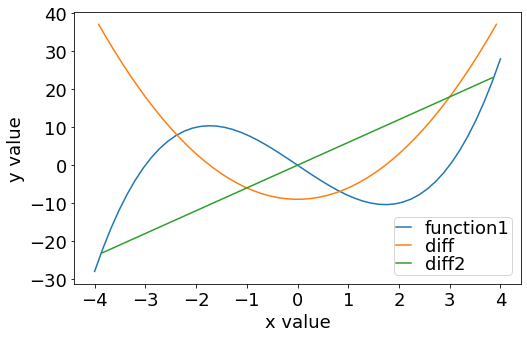

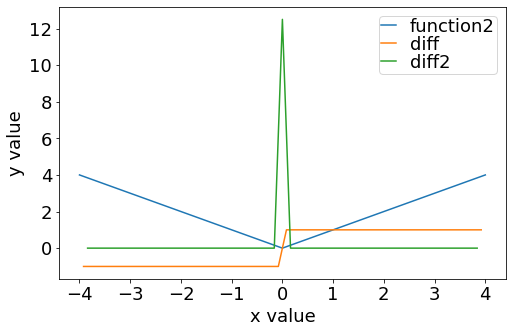

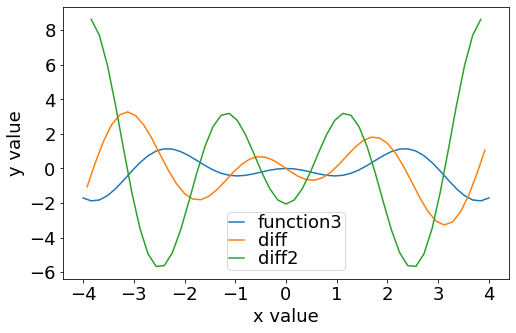

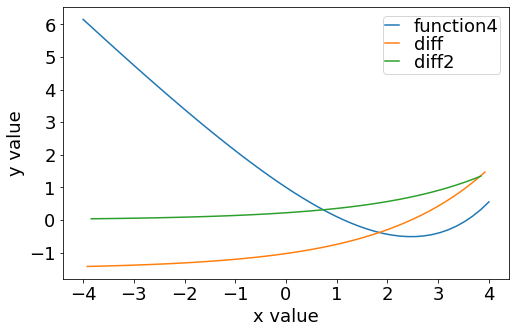

In [72]:
f=[function1(num), function2(num), function3(num), function4(num)]
for i, currf in enumerate(f): #currf is current function from list f
    j=i+1
    func='function'+str(j)
    test=deriv(currf)
    dydx_diff, num, num2=test.firstderiv()
    d2ydx2_diff, num3=test.secondderiv()
    
    test.plotfunc(dydx_diff, num, num2, func)#, dydx_grad_e2)

## Task 2

Compute and plot the partial first derivatives of the above two-dimensional functions using autograd in the value range from -4 to 4 using an appropriate grid spacing. 


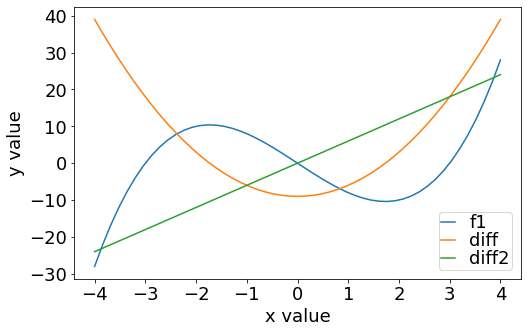

In [87]:
dydx_autograd=[]

grad_fct = grad(function1)

for i1 in num:
    dydx_autograd.append(grad_fct(i1))

myfunc = function5(num)

d2ydx2_autograd=egrad(egrad(function1))(num)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(num,fnc,label='f1')
plt.plot(num,dydx_autograd,label='diff')
plt.plot(num,d2ydx2_autograd,label='diff2')
plt.xticks(fontsize=mf)
plt.yticks(fontsize=mf)
ax.set_xlabel('x value',fontsize=mf)
ax.set_ylabel('y value',fontsize=mf)
legend = ax.legend(loc='lower right', shadow=False,fontsize=mf,
                   borderpad = 0.1, labelspacing = 0, handlelength = 0.8)
plt.show()